In [ ]:
from IPython.display import HTML
HTML(filename='/Users/hubatsl/Desktop/SPT/Us/SPT/Python/hide_code.html')

# Test for databank system

In [ ]:
from ipywidgets import interact
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import os
import seaborn as sns
import sys
import tifffile
import time
# Add path to python modules
sys.path.append(os.getcwd()[0:-7]+'src/') 
from MovieTracks import (DiffusionFitter, OffRateFitter, ParticleFinder)
# Plotting becomes part of the notebook
%matplotlib inline

In [ ]:
o = OffRateFitter('/Users/hubatsl/Desktop/PAR_3_Cropped/cropT/CONTROL/dmso_E2 meiosis2 15s PERFECT_cropT.tif', 1000, pixelSize=0.120, autoMetaDataExtract=False, timestep=15000)

**Run thresholding on movie movieNo, read and write threshold from excel file**

In [ ]:
xls_file = '/Users/hubatsl/Desktop/PAR_3_Cropped/FlorentPAR3Clusters.xlsx'
xls_db = pd.read_excel(xls_file)
movieNo = 0
if np.isnan(xls_db['Threshold'][movieNo]):
    xls_db.loc[movieNo, 'Threshold']=300
thresh = int(xls_db['Threshold'][movieNo])
if np.isnan(xls_db['StartFrame'][movieNo]):
    xls_db.loc[movieNo, 'StartFrame'] = 0
startFrame = int(xls_db.loc[movieNo, 'StartFrame'])

def adj_thresh(calibFrame, thresh, startFrame):
    calibFrame = int(calibFrame)
    thresh = int(thresh)
    startFrame = int(startFrame)
    o = OffRateFitter(xls_db['Folder'][movieNo], thresh, pixelSize=0.120, startFrame=startFrame, autoMetaDataExtract=False, timestep=15000)
    print(xls_db['Folder'][movieNo])
    o.plot_calibration(calibrationFrame=calibFrame)
    xls_db.loc[movieNo, 'StartFrame'] = startFrame
    xls_db.loc[movieNo, 'Threshold'] = thresh
    xls_db.to_excel(xls_file)

interact(adj_thresh, thresh=str(thresh), calibFrame='200', startFrame=str(startFrame),
         __manual=True)

**Read time stamps for each movie, write to excel file**

Frame 0: 613 features


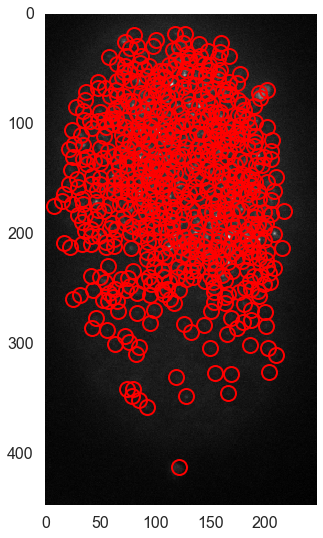

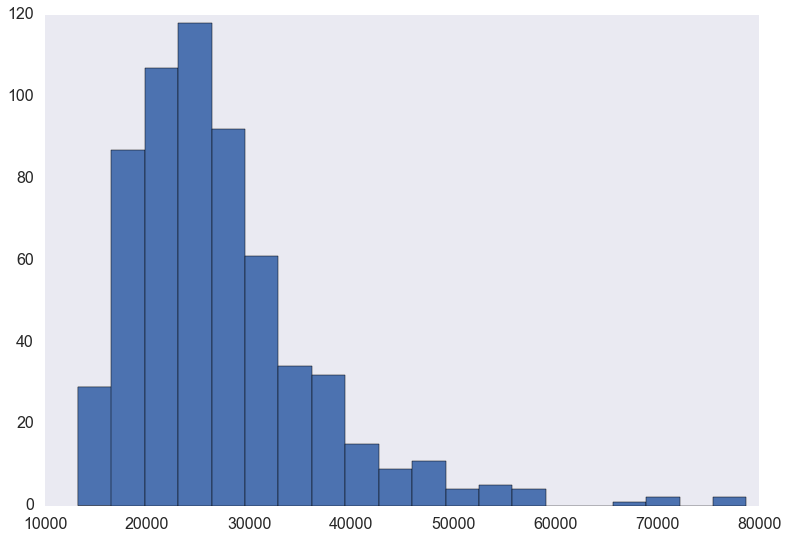

In [34]:
p = ParticleFinder('/Users/hubatsl/Desktop/WT_kk1216_E1 PNmig 5s-1.tif', autoMetaDataExtract=False, timestep=1)
p.parallel = False
p.threshold = 900
p.find_feats()
p.plot_calibration()
plt.hist(p.features['raw_mass'], bins = 20)
plt.show()

Frame 0: 393 features


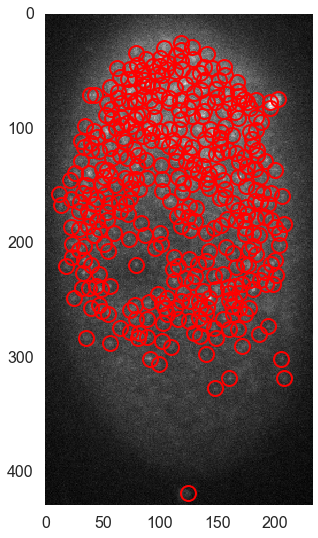

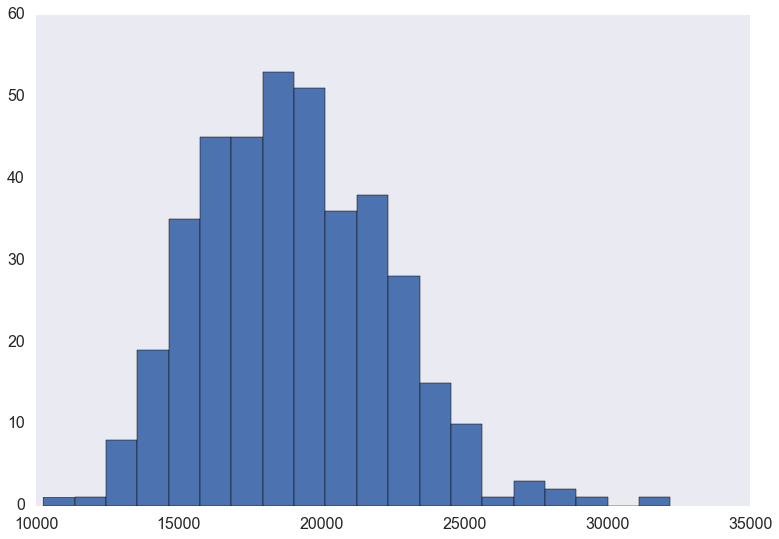

In [32]:
p = ParticleFinder('/Users/hubatsl/Desktop/WT_kk1216_E1 PNmig 5s_maint.tif', autoMetaDataExtract=False, timestep=1)
p.parallel = False
p.threshold = 900
p.find_feats()
p.plot_calibration()
plt.hist(p.features['raw_mass'], bins = 20)
plt.show()